# Building a linear regression model

In [9]:
%cd ~/deep-learning-workshop/

/gpfs/global_fs01/sym_shared/YPProdSpark/user/sf43-5b3dded8612265-7cbe6a591d13/deep-learning-workshop


In [2]:
%matplotlib inline
# reload external modules when they change.
%load_ext autoreload  
%autoreload 2

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns # prettier plots
sns.set_style('white') # get rid of the grids

In [4]:
# Don't worry about what all these are -- used later
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [10]:
ls

01-regression-keras.ipynb            08b-imdb-bug-report.ipynb  helpers.py
02-notmnist-mlp-keras.ipynb          08-imdb-explore.ipynb      helpers.pyc
03-notmnist-keras-tensorboard.ipynb  09-imdb-mlp-cnn.ipynb      img/
04-compare-cpu-gpu.ipynb             10b-cars-continued.ipynb   notmnist.py
05-tensorflow-demo.ipynb             10-cars.ipynb              notmnist.pyc
06-notmnist-cnn-keras.ipynb          10-image-captioning.ipynb  README.md
07b-cat-wrangling.ipynb              display.py
07-transfer-cnn-keras.ipynb          display.pyc


In [11]:
from helpers import printoptions  # make numpy printouts prettier
from display import plot_training_curves, visualize_keras_model

In [12]:
# let's build a really simple model: linear regression from 
# 2 inputs to a single float output

model = Sequential()
model.add(Dense(output_dim=1, input_dim=2))

# mean squared error regression, RMSprop optimizer
model.compile(loss='mse', optimizer='rmsprop')

Let's look at our model:

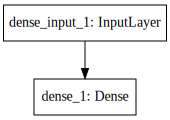

In [13]:
visualize_keras_model(model)

In [ ]:
model.summary

Let's make up some data:

$y = 3a + 5b + N(0,1)$

where the last term is normally distributed error.

In [9]:
num_samples = 100
data = np.random.random((num_samples, 2))
noise = np.random.normal(size=num_samples)
values = 3 * data[:,0] + 5 * data[:,1] + noise

In [10]:
# Look at it:
with printoptions(precision=2, threshold=20):
    print data
    print noise
    print values

[[ 0.14  0.48]
 [ 0.72  0.57]
 [ 0.33  0.18]
 ..., 
 [ 0.21  0.78]
 [ 0.29  0.27]
 [ 0.62  0.01]]
[-0.78 -0.24  0.16 ..., -0.31  0.89 -1.29]
[ 2.03  4.77  2.07 ...,  4.25  3.11  0.62]


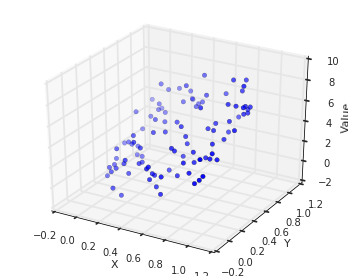

In [11]:
# and plot it 
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs=data[:,0], ys=data[:,1], zs=values)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Value')
fig.tight_layout()

We can see that (as expected) the values lie roughly in a plane, so our linear model should do a good job...

Let's fit it!

In [12]:
history = model.fit(data, values, nb_epoch=10, batch_size=32)

Epoch 1/10
100/100 [==============================] - 0s - loss: 11.5583     
Epoch 2/10
100/100 [==============================] - 0s - loss: 11.4604     
Epoch 3/10
100/100 [==============================] - 0s - loss: 11.3912    
Epoch 4/10
100/100 [==============================] - 0s - loss: 11.3287     
Epoch 5/10
100/100 [==============================] - 0s - loss: 11.2766     
Epoch 6/10
100/100 [==============================] - 0s - loss: 11.2220     
Epoch 7/10
100/100 [==============================] - 0s - loss: 11.1706     
Epoch 8/10
100/100 [==============================] - 0s - loss: 11.1198     
Epoch 9/10
100/100 [==============================] - 0s - loss: 11.0690     
Epoch 10/10
100/100 [==============================] - 0s - loss: 11.0219     


In [13]:
# the history object keeps track of the loss (and other metrics if we have them)
history.history

{'loss': [11.558265151977539,
  11.460448722839356,
  11.391243286132813,
  11.328678817749024,
  11.276610183715821,
  11.221962203979492,
  11.17061767578125,
  11.119795227050782,
  11.068986053466796,
  11.021876087188721]}

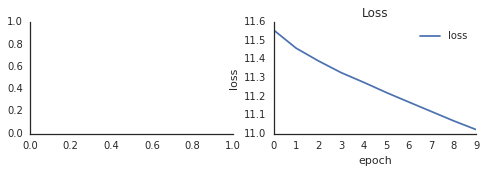

In [14]:
# A handy function to plot
plot_training_curves(history.history);

Error still high and dropping. Let's keep fitting for a long time -- it's fast.

In [15]:
history = model.fit(data, values, nb_epoch=1000, batch_size=32, verbose=0)

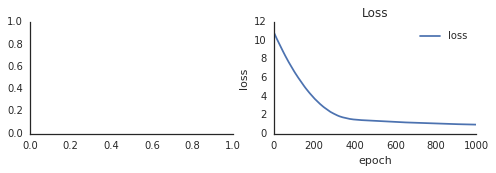

In [16]:
plot_training_curves(history.history);

Let's see how it's doing.

In [17]:
help(model.evaluate)

Help on method evaluate in module keras.models:

evaluate(self, x, y, batch_size=32, verbose=1, sample_weight=None, **kwargs) method of keras.models.Sequential instance
    Computes the loss on some input data, batch by batch.
    
    # Arguments
        x: input data, as a Numpy array or list of Numpy arrays
            (if the model has multiple inputs).
        y: labels, as a Numpy array.
        batch_size: integer. Number of samples per gradient update.
        verbose: verbosity mode, 0 or 1.
        sample_weight: sample weights, as a Numpy array.
    
    # Returns
        Scalar test loss (if the model has no metrics)
        or list of scalars (if the model computes other metrics).
        The attribute `model.metrics_names` will give you
        the display labels for the scalar outputs.



In [18]:
model.evaluate(data, values, batch_size=32)

 32/100 [========>.....................] - ETA: 0s

0.9876962614059448

And now we can look at the weights -- since it's a tiny linear model we can look at them directly.

In [19]:
model.get_weights()

[array([[ 2.38395834],
        [ 4.13938093]], dtype=float32), array([ 0.77046669], dtype=float32)]

So it's learned a model of $2.5a + 2.65b + 1.3$. Not quite right.

Let's save the learned weights and use our "known" weights instead to see how they do.

In [20]:
saved_weights = model.get_weights()
model.set_weights([np.array([[3], [5]]), np.array([0])])
model.evaluate(data, values)

 32/100 [========>.....................] - ETA: 0s

0.83863275289535522

In [21]:
# What is this loss value? We said loss='mse' above. Let's check that...

deltas = values - (3 * data[:,0] + 5 * data[:,1])  # i.e. the noise
squared_deltas = np.square(deltas)
np.mean(squared_deltas)

0.83863272374610032

So, it is indeed what we told Keras to use: MSE, or Mean Squared Error

So, why did it take so long to learn? Because the learning rate is low, and the variable initialization isn't very good for our problem.

Let's try to tweak the optimizer:

In [22]:
model2 = Sequential()
model2.add(Dense(output_dim=1, input_dim=2))

# the default learning rate we used above is 0.001, so this is 100 times higher.
optimizer = RMSprop(lr=0.1)
model2.compile(loss='mse', optimizer=optimizer)

In [23]:
history = model2.fit(data, values, nb_epoch=10, batch_size=32)

Epoch 1/10
100/100 [==============================] - 0s - loss: 12.8329     
Epoch 2/10
100/100 [==============================] - 0s - loss: 5.5404     
Epoch 3/10
100/100 [==============================] - 0s - loss: 3.1632     
Epoch 4/10
100/100 [==============================] - 0s - loss: 2.0728     
Epoch 5/10
100/100 [==============================] - 0s - loss: 1.7217     
Epoch 6/10
100/100 [==============================] - 0s - loss: 1.5406     
Epoch 7/10
100/100 [==============================] - 0s - loss: 1.4624     
Epoch 8/10
100/100 [==============================] - 0s - loss: 1.4337     
Epoch 9/10
100/100 [==============================] - 0s - loss: 1.3844     
Epoch 10/10
100/100 [==============================] - 0s - loss: 1.3140     


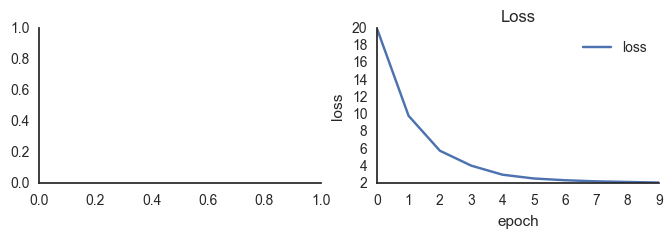

In [40]:
plot_training_curves(history.history);

Aha -- higher learning rate certainly helps. Could also fiddle with initialization values: let's "cheat" and give it the exact "correct" values.

In [24]:
model3 = Sequential()
model3.add(Dense(output_dim=1, input_dim=2, 
                 weights=[np.array([[3],[5]]), np.array([0])]))

# reduced LR from model2 so it doesn't bounce around as much
optimizer = RMSprop(lr=0.01)  
model3.compile(loss='mse', optimizer=optimizer)

In [25]:
model3.evaluate(data, values, batch_size=32)

 32/100 [========>.....................] - ETA: 0s

0.83863275289535522

In [26]:
model3.fit(data, values, nb_epoch=10, batch_size=32)

Epoch 1/10
100/100 [==============================] - 0s - loss: 0.8436     
Epoch 2/10
100/100 [==============================] - 0s - loss: 0.8381     
Epoch 3/10
100/100 [==============================] - 0s - loss: 0.8381     
Epoch 4/10
100/100 [==============================] - 0s - loss: 0.8372     
Epoch 5/10
100/100 [==============================] - 0s - loss: 0.8386     
Epoch 6/10
100/100 [==============================] - 0s - loss: 0.8351     
Epoch 7/10
100/100 [==============================] - 0s - loss: 0.8357     
Epoch 8/10
100/100 [==============================] - 0s - loss: 0.8360     
Epoch 9/10
100/100 [==============================] - 0s - loss: 0.8365     
Epoch 10/10
100/100 [==============================] - 0s - loss: 0.8334     


Interesting: we started with the "correct" parameters used to generate the data, but the network keeps "learning" and getting lower training error. So even with just two parameters, we can _overfit_, get distracted by the noise. Validation sets will help... in a future notebook.